Machine learning doesn't like numbers that aren't nice and normalized. Also, if it's not a number (e.g nominal or ordinal string values), it generally should be.

# Extraction, first look

In [2]:
library(ggplot2)
library(dplyr)

# Let's look at the dataset roughly
census <- read.csv("census_us.csv")
head(census)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,makes
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [6]:
# 1. Which attributes are numeric?
nums <- sapply(census, is.numeric)
num_atts <- names(nums[nums])

num_atts

# 2. Let's see the range of numeric attributes
apply(census[, num_atts], 2, range)

# 3. Let's see the standard deviation of numeric attributes
apply(census[, num_atts], 2, sd)

[1] "age"            "fnlwgt"         "education.num"  "capital.gain"  
[5] "capital.loss"   "hours.per.week"

age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
17,12285,1,0,0,1
90,1484705,16,99999,4356,99


age         fnlwgt  education.num   capital.gain   capital.loss 
  1.372241e+01   1.048780e+05   2.394966e+00   7.381899e+03   4.056817e+02 
hours.per.week 
  1.241720e+01

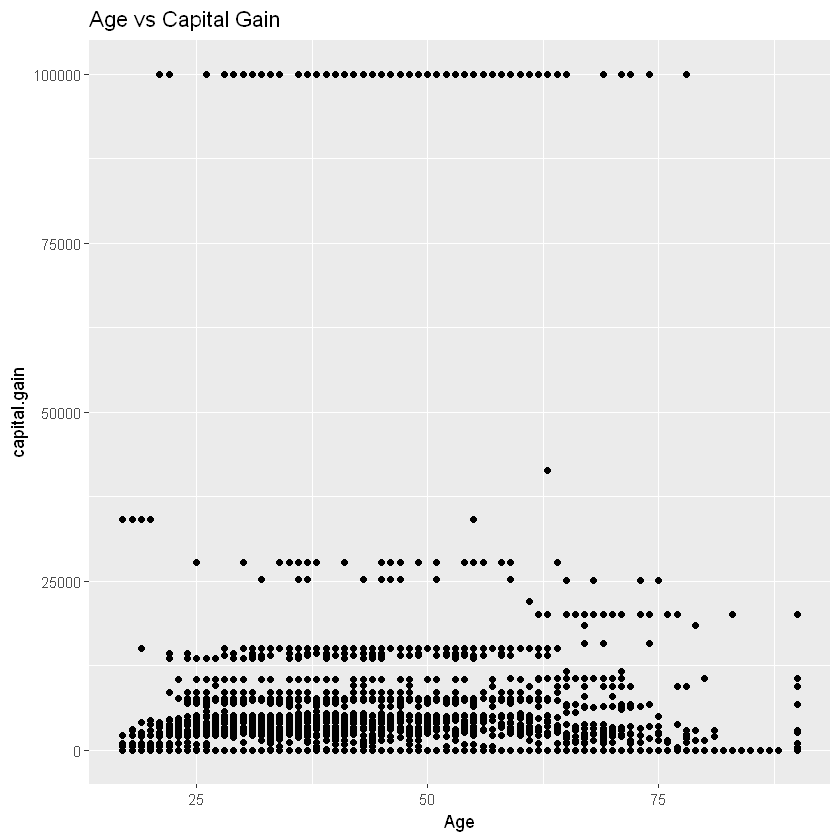

In [7]:
# Visualize Age vs Capital Gain, with untransformed data

ggplot(census) +
  geom_point(aes(x = age, y = capital.gain)) +
  ggtitle("Age vs Capital Gain") +
  xlab("Age")

# Transformation

Normalizing

In [10]:
# For now, let's just keep the attributes we are going to transform
num_census <- census[, num_atts]

# 1. Normalizing
normalize <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}
census.norm <- as.data.frame(apply(num_census, 2, normalize))

# Range of normalized data (should be between 0 and 1)
apply(census.norm, 2, range)

age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,0,0,0,0,0
1,1,1,1,1,1


Standardizing

Some stats techniques like PCA require us standardize our data (i.e turn the data to be centered around 0, with a mean of 0 and a stdev of 1). We can do this with scale().

age         fnlwgt  education.num   capital.gain   capital.loss 
  2.711555e-16  -6.827338e-17  -2.980132e-16  -4.623121e-18  -7.909971e-18 
hours.per.week 
  4.991205e-17

age         fnlwgt  education.num   capital.gain   capital.loss 
             1              1              1              1              1 
hours.per.week 
             1

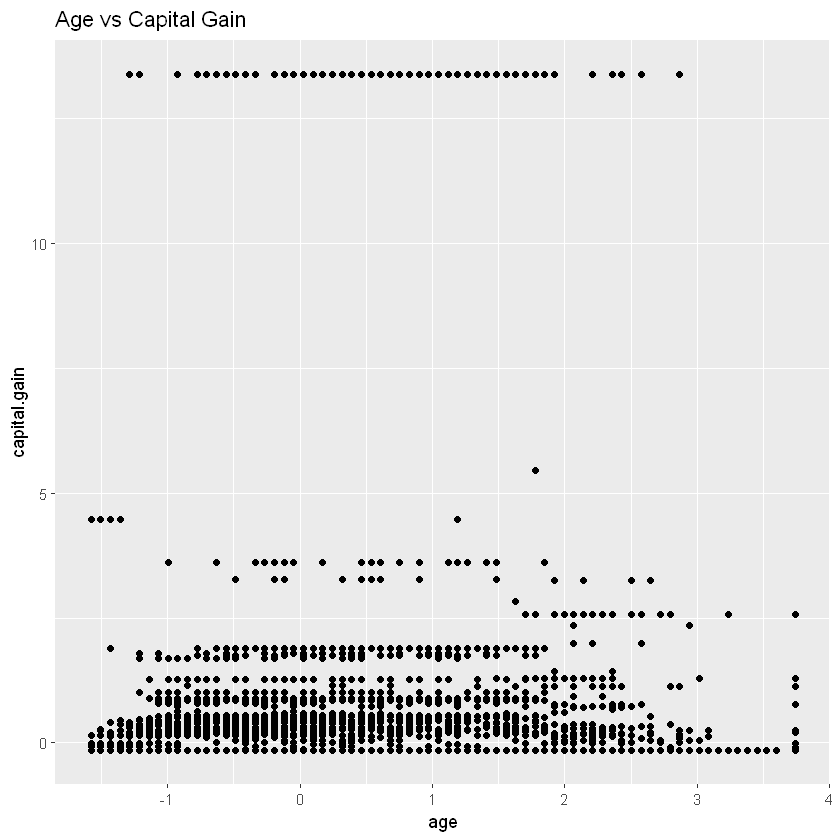

In [13]:
census.stand <- as.data.frame(scale(num_census))

# Take a look at our results
apply(census.stand, 2, mean)
apply(census.stand, 2, sd)

ggplot(census.stand) +
  geom_point(aes(x = age, y = capital.gain)) +
  ggtitle("Age vs Capital Gain")

# Joining data

Dr. Michael has fooled us once again by fabricating the so-called country of "Spain" in the video. We'll just the census data from Mexico instead.

In [14]:
mexico <- read.csv("census_mexico.csv")

# To combine them, first ensure that units are the same and distributions are similar

head(num_census)
head(mexico)

mexico$capital.gain <- mexico$peso.capital.gain * 3.11  # Exchange rate on the year of collection (1994)
mexico$capital.loss <- mexico$peso.capital.loss * 3.11

# Let's keep the attributes that we need from each, concatenate them and study their distribution

num_census <- cbind(census[,num_atts], native.country=census$native.country)
num_mexico <- cbind(mexico[,num_atts], native.country=mexico$native.country)

united <- rbind(num_census, num_mexico)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
,<int>,<int>,<int>,<int>,<int>,<int>
1,39,77516,13,2174,0,40
2,50,83311,13,0,0,13
3,38,215646,9,0,0,40
4,53,234721,7,0,0,40
5,37,284582,14,0,0,40
6,52,209642,9,0,0,45


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,peso.capital.gain,peso.capital.loss,hours.per.week,native.country,makes
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
2,46,Private,216666,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
3,27,Private,213921,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,40,Mexico,<=50K
4,19,Private,316868,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,30,Mexico,<=50K
5,47,Local-gov,186009,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,38,Mexico,<=50K
6,36,Private,207157,Some-college,10,Divorced,Other-service,Unmarried,White,Female,0,0,40,Mexico,<=50K


# Visualizing joined data

Let's plot a bar chart that counts values to see if our new dataset is proper.

A few values outside of the standard range, but it's mostly okay. Can be a judgement call, depending on the data.

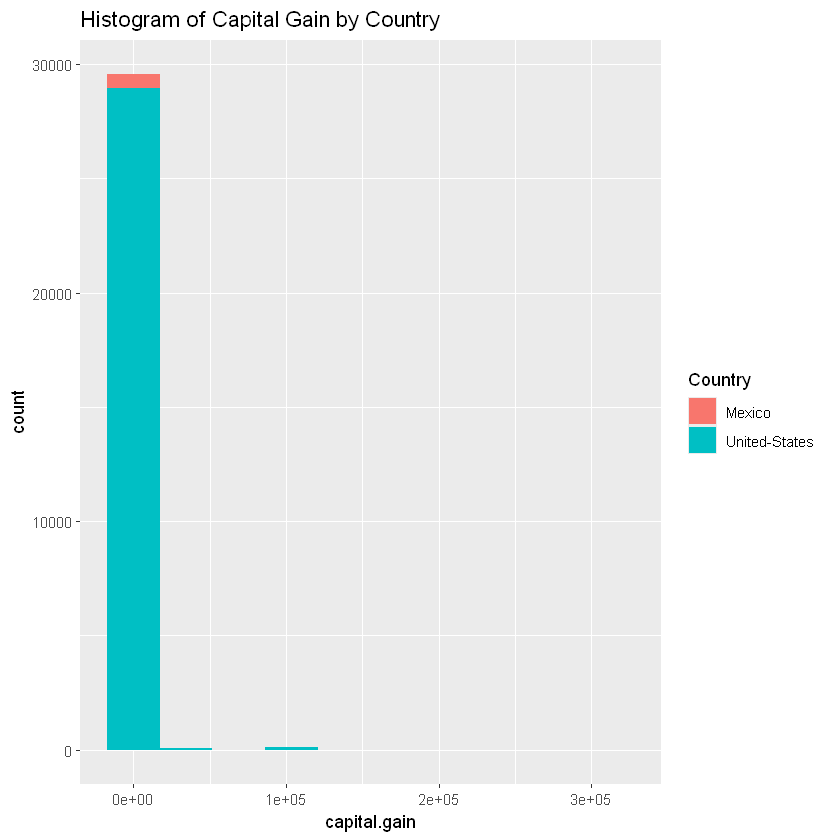

In [15]:
ggplot() + 
  geom_histogram(data = united, bins = 10, aes(x = capital.gain, fill = native.country)) +
  scale_fill_discrete(name = "Country") +
  ggtitle("Histogram of Capital Gain by Country")

Now with capital loss

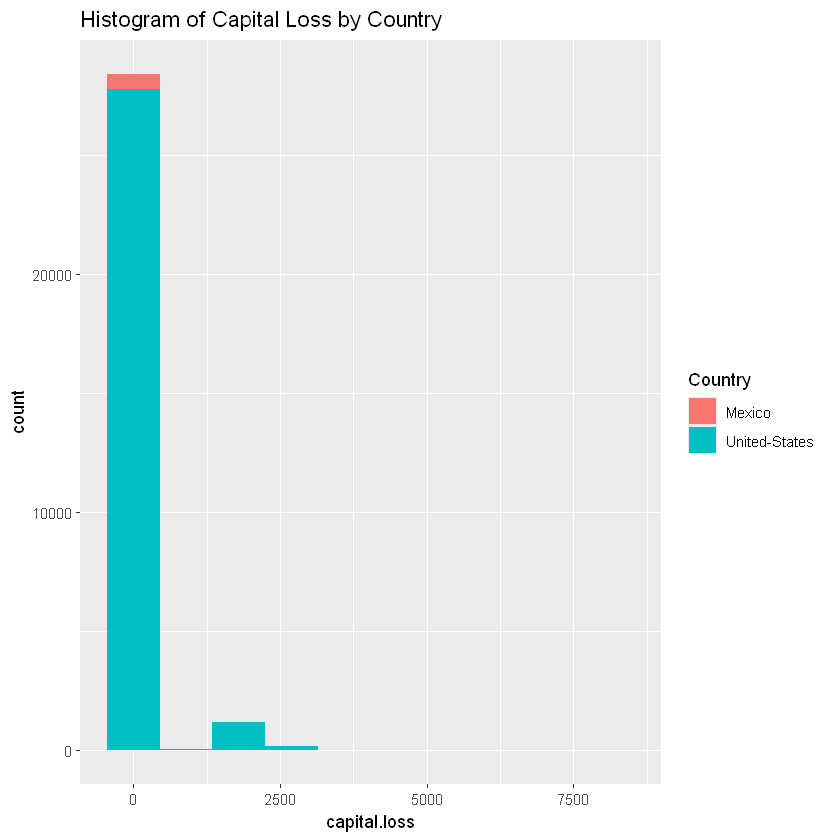

In [16]:
ggplot() +
  geom_histogram(data = united, bins = 10, aes(x = capital.loss, fill = native.country)) +
  scale_fill_discrete(name = "Country") +
  ggtitle("Histogram of Capital Loss by Country")

Finally, let's take a look at ages. The distributions look about the same: a somewhat right-skewed bell curve.

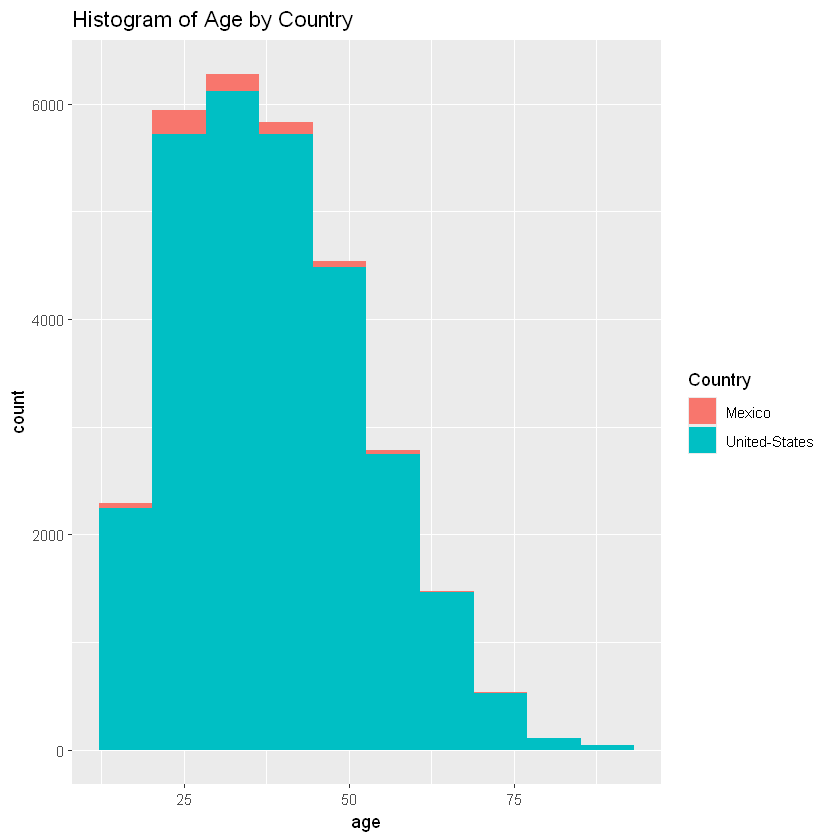

In [17]:
ggplot() +
  geom_histogram(data = united, bins = 10, aes(x = age, fill = native.country)) +
  scale_fill_discrete(name = "Country") +
  ggtitle("Histogram of Age by Country")